In [1700]:
import numpy as  np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [1701]:
Datasets = pd.read_csv("C:/Users/admin/Desktop/project/Telecom_Customer_Churn\WA_Fn-UseC_-Telco-Customer-Churn.csv")

In [1702]:
Datasets.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [1703]:
Data = Datasets.copy()

#  copy the dataframe for references

# Exploaratory Data analysis

In [1704]:
Datasets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [1705]:
Datasets = Datasets.drop("customerID", axis = 1)

In [1706]:
Datasets.describe()
#Datasets consists of 7043 ine items 
# Average nonthly charges is aproximately 55 with 30 devaitioj from the mean


,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [1707]:
Datasets.isnull().sum()
# Data is clean with no missing values

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [1708]:
# Working with Categorical data

for columns in Datasets:
    if Datasets[columns].dtype == "O":
        print("Categorical data")
        print( Datasets[columns].value_counts())
        print()
       

Categorical data
Male      3555
Female    3488
Name: gender, dtype: int64

Categorical data
No     3641
Yes    3402
Name: Partner, dtype: int64

Categorical data
No     4933
Yes    2110
Name: Dependents, dtype: int64

Categorical data
Yes    6361
No      682
Name: PhoneService, dtype: int64

Categorical data
No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64

Categorical data
Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64

Categorical data
No                     3498
Yes                    2019
No internet service    1526
Name: OnlineSecurity, dtype: int64

Categorical data
No                     3088
Yes                    2429
No internet service    1526
Name: OnlineBackup, dtype: int64

Categorical data
No                     3095
Yes                    2422
No internet service    1526
Name: DeviceProtection, dtype: int64

Categorical data
No                     3473
Yes       

In [1709]:
Datasets["TotalCharges"] = Datasets.drop(Datasets["TotalCharges"][Datasets["TotalCharges"]==" "].index)["TotalCharges"].astype(np.float)

#  Removing Empty string from the Total charges column

In [1710]:
Datasets.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7032.000000
mean,0.162147,32.371149,64.761692,2283.300441
std,0.368612,24.559481,30.090047,2266.771362
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.850000,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


In [1711]:
# Synchronizing common categorica data in the datasets

for columns in Datasets:
    if Datasets[columns].dtype == "O":
        Datasets[columns] = np.where(Datasets[columns].str.contains("No "), "No", Datasets[columns])
        


In [1712]:
Datasets.head(10)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,Female,0,No,No,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,Yes
6,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.40,No
7,Female,0,No,No,10,No,No,DSL,Yes,No,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.90,No
8,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,Male,0,No,Yes,62,Yes,No,DSL,Yes,Yes,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


In [1713]:
for columns in Datasets:
    if Datasets[columns].dtype == "O":
        print("Categorical data")
        print( Datasets[columns].value_counts())
        print()

Categorical data
Male      3555
Female    3488
Name: gender, dtype: int64

Categorical data
No     3641
Yes    3402
Name: Partner, dtype: int64

Categorical data
No     4933
Yes    2110
Name: Dependents, dtype: int64

Categorical data
Yes    6361
No      682
Name: PhoneService, dtype: int64

Categorical data
No     4072
Yes    2971
Name: MultipleLines, dtype: int64

Categorical data
Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64

Categorical data
No     5024
Yes    2019
Name: OnlineSecurity, dtype: int64

Categorical data
No     4614
Yes    2429
Name: OnlineBackup, dtype: int64

Categorical data
No     4621
Yes    2422
Name: DeviceProtection, dtype: int64

Categorical data
No     4999
Yes    2044
Name: TechSupport, dtype: int64

Categorical data
No     4336
Yes    2707
Name: StreamingTV, dtype: int64

Categorical data
No     4311
Yes    2732
Name: StreamingMovies, dtype: int64

Categorical data
Month-to-month    3875
Two year          16

In [1714]:
Datasets.isnull().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [1715]:
# Removing missing values
Datasets = Datasets.dropna()


In [1716]:
Datasets.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [1717]:
Data = Datasets.copy()

In [1718]:
Features = Datasets.drop("Churn", axis = 1)


Y = Datasets["Churn"]

<AxesSubplot:xlabel='gender', ylabel='count'>

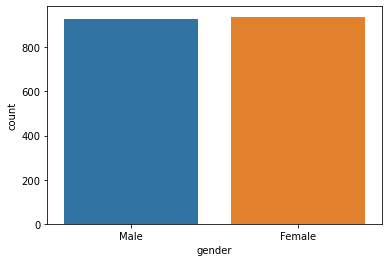

In [1719]:
sb.countplot(x = "gender", data = Datasets.query('Churn == "Yes"'))


<AxesSubplot:xlabel='Contract', ylabel='count'>

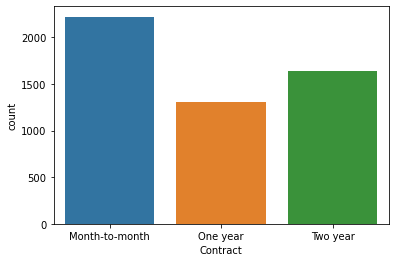

In [1720]:
sb.countplot(x = "Contract", data = Datasets.query('Churn == "No"'))


<AxesSubplot:xlabel='MonthlyCharges', ylabel='Density'>

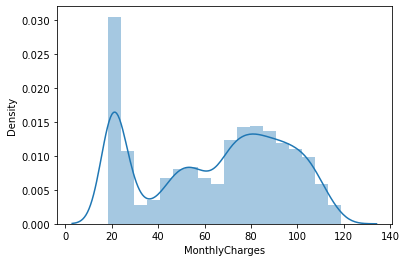

In [1721]:
sb.distplot(Datasets["MonthlyCharges"])

<AxesSubplot:xlabel='Churn', ylabel='MonthlyCharges'>

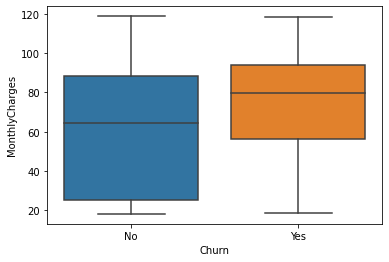

In [1722]:
sb.boxplot(x = "Churn", y = "MonthlyCharges", data = Datasets)

<AxesSubplot:xlabel='Churn', ylabel='TotalCharges'>

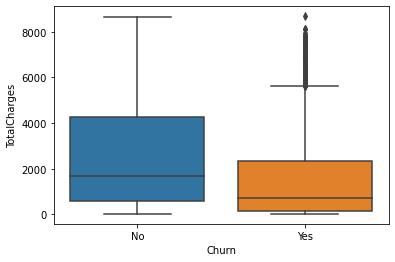

In [1723]:
sb.boxplot(y = "TotalCharges", x = "Churn", data = Datasets)

<AxesSubplot:xlabel='gender', ylabel='MonthlyCharges'>

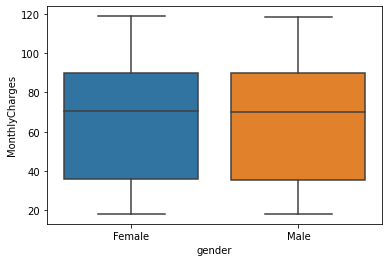

In [1724]:
sb.boxplot(x = "gender", y = "MonthlyCharges", data = Datasets)

<AxesSubplot:xlabel='SeniorCitizen', ylabel='count'>

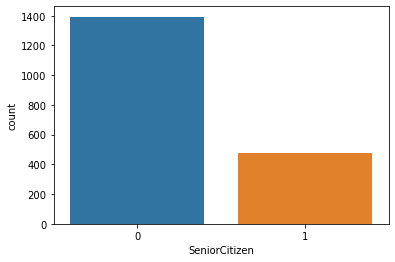

In [1725]:
sb.countplot(x = "SeniorCitizen", data = Datasets.query('Churn == "Yes"'))

# The Youger Generations are leaving the Telcoms company

# Feature Engineering


I will experiment with OneHotEncoding(dummy variables) and LabelEncoder to get the better feature performance
Encoding Categorical data.

The TotalCharges and Tenure will be transfpormed to get TotalChargesPerMonth for better performance

In [1726]:
Features["TotChargesPerTenure"] = Features["TotalCharges"].div(Features["tenure"])
Features

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,TotChargesPerTenure
0,Female,0,Yes,No,1,No,No,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,29.850000
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,55.573529
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,54.075000
3,Male,0,No,No,45,No,No,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,40.905556
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,75.825000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,82.937500
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,102.262500
7040,Female,0,Yes,Yes,11,No,No,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,31.495455
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,76.650000


In [1727]:
#  feature engineering with OneHotEncoding


from sklearn.base import TransformerMixin, BaseEstimator

In [1728]:
class ColumnEncoder(TransformerMixin, BaseEstimator):
    def __init__(self):
        
        self.column = []
        
    def fit(self, X, Y = None):
        
        for Column in X.columns:
            
            if X[Column].dtype == "O":
                self.column.append(Column)
        return self
    
    def transform(self, X, Y = None):
        Dummy = pd.get_dummies(X[self.column])
        Frame = pd.DataFrame(X.drop(self.column, axis =1))
        Feature = pd.concat([Frame, Dummy], axis =1)
        return Feature
       
                
    
cat = ColumnEncoder()

In [1729]:
X = cat.fit_transform(Features)

In [1730]:
X.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,TotChargesPerTenure,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,29.850000,1,0,0,1,1,...,0,1,0,0,0,1,0,0,1,0
1,0,34,56.95,1889.50,55.573529,0,1,1,0,1,...,0,0,1,0,1,0,0,0,0,1
2,0,2,53.85,108.15,54.075000,0,1,1,0,1,...,0,1,0,0,0,1,0,0,0,1
3,0,45,42.30,1840.75,40.905556,0,1,1,0,1,...,0,0,1,0,1,0,1,0,0,0
4,0,2,70.70,151.65,75.825000,1,0,1,0,1,...,0,1,0,0,0,1,0,0,1,0


# Scaling The Numerical columns

In [1731]:
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [1732]:
Numeric_col = X.columns[1:5]
Numeric_col

Index(['tenure', 'MonthlyCharges', 'TotalCharges', 'TotChargesPerTenure'], dtype='object')

In [1733]:
Scaler = StandardScaler()
X[Numeric_col] = Scaler.fit_transform(X[Numeric_col])
Encoder = LabelEncoder()
Datasets["Churn"] = Encoder.fit_transform(Datasets["Churn"])
Y =  Datasets["Churn"]


In [1734]:
X

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,TotChargesPerTenure,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,-1.280248,-1.161694,-0.994194,-1.157889,1,0,0,1,1,...,0,1,0,0,0,1,0,0,1,0
1,0,0.064303,-0.260878,-0.173740,-0.305658,0,1,1,0,1,...,0,0,1,0,1,0,0,0,0,1
2,0,-1.239504,-0.363923,-0.959649,-0.355305,0,1,1,0,1,...,0,1,0,0,0,1,0,0,0,1
3,0,0.512486,-0.747850,-0.195248,-0.791614,0,1,1,0,1,...,0,0,1,0,1,0,1,0,0,0
4,0,-1.239504,0.196178,-0.940457,0.365282,1,0,1,0,1,...,0,1,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,-0.343137,0.664868,-0.129180,0.600922,0,1,0,1,0,...,1,0,1,0,0,1,0,0,0,1
7039,0,1.612573,1.276493,2.241056,1.241167,1,0,0,1,0,...,1,0,1,0,0,1,0,1,0,0
7040,0,-0.872808,-1.170004,-0.854514,-1.103374,1,0,0,1,0,...,0,1,0,0,0,1,0,0,1,0
7041,1,-1.158016,0.319168,-0.872095,0.392615,0,1,0,1,1,...,0,1,0,0,0,1,0,0,0,1


In [1735]:
Y

0       0
1       0
2       1
3       0
4       1
       ..
7038    0
7039    0
7040    0
7041    1
7042    0
Name: Churn, Length: 7032, dtype: int32

# Dealing with inbalance Data

In [1736]:
Y.value_counts(), len(Y), len(X) #  This target is not balance, The psitive Churn is almost 3 times the the negative churn

(0    5163
 1    1869
 Name: Churn, dtype: int64,
 7032,
 7032)

In [1737]:
# This will be carried out using the imblearn module to balance inbalnce data using Undersampling and Over sampling technique to balnace this data

from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

In [1738]:
print("pre balance target"),
Y.value_counts()

pre balance target


0    5163
1    1869
Name: Churn, dtype: int64

# Undersapling the majority class


In [1739]:

Under_Sample = RandomUnderSampler(sampling_strategy = "majority")
Under_X, Under_Y = Under_Sample.fit_resample(X,Y)

In [1740]:
Under_X

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,TotChargesPerTenure,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1.490341,-1.324572,-0.249249,-1.321764,1,0,0,1,1,...,0,0,0,1,0,1,0,1,0,0
1,0,-0.343137,0.049920,-0.319354,0.005886,1,0,0,1,1,...,0,1,0,0,1,0,0,0,0,1
2,0,0.634718,-0.309077,0.151790,-0.333390,1,0,1,0,1,...,0,0,0,1,1,0,0,1,0,0
3,0,1.449597,0.402269,1.208721,0.300434,0,1,1,0,1,...,1,0,1,0,0,1,0,1,0,0
4,0,0.675462,-1.492436,-0.556205,-1.455420,0,1,1,0,1,...,0,0,0,1,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3733,0,-0.832064,-0.166143,-0.686267,-0.137472,0,1,1,0,1,...,0,0,1,0,0,1,0,0,1,0
3734,0,-0.954296,-0.684694,-0.829411,-0.662037,1,0,1,0,1,...,0,1,0,0,0,1,1,0,0,0
3735,1,-1.280248,0.364042,-0.973944,0.362797,0,1,1,0,1,...,0,1,0,0,0,1,0,0,1,0
3736,0,1.408853,1.268182,2.030764,1.258307,1,0,1,0,1,...,0,1,0,0,0,1,0,1,0,0


In [1741]:
print("Post balance Undersample y")
Under_Y.value_counts()

Post balance Undersample y


0    1869
1    1869
Name: Churn, dtype: int64

# Building a Model
6 model will be used to train the datasets and the top 2 models with the highest cross validation score will be used to test data and other metrics<br>
These models are:
1. Logistic Regression
2. Knearest Neighbors
3. Support Vector Machine
4. Decision Tree
5. Random Forest
6. Xgboost

In [1742]:

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split, StratifiedKFold, KFold, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

In [1743]:
#  Creating a train, test, validation data which are used on validation set to get the cross validation score for each folds

In [1744]:
X_Train_Under, X_Test_Under, Y_Train_Under, Y_Test_Under = train_test_split(Under_X, Under_Y, random_state = 42, test_size = 0.2, shuffle = True)

In [1745]:
Classifiers = {
    
    "LogisticsRegression": LogisticRegression(n_jobs = -1 ),
    
    "Kneighbours": KNeighborsClassifier(n_neighbors = 2),
    
    "SupportVector": SVC(),
    
    "DecisionTree" : DecisionTreeClassifier(max_depth = 4),
    
    "RandomForest" : RandomForestClassifier(),
    
    "xgb" : XGBClassifier(booster = "gbtree", n_jobs = -1, max_depth = 3, eta = 0.3, gamma = 0.1, eval_metric = "logloss", use_label_encoder = False, objective = "binary:logistic")
    
    }
score = []
for name,  classifier in Classifiers.items():
    n_folds = KFold(n_splits = 4, shuffle = True, random_state = 42)
    cv_score = cross_val_score(classifier, X_Train_Under, Y_Train_Under, cv = n_folds, scoring = "accuracy")
    score.append(cv_score)
    print(f"{name} accuracy is: {np.mean(score)}")
    print()

LogisticsRegression accuracy is: 0.7595233876683204

Kneighbours accuracy is: 0.7080259540837146

SupportVector accuracy is: 0.7225152839522081

DecisionTree accuracy is: 0.731851089742213

RandomForest accuracy is: 0.7340411557101847

xgb accuracy is: 0.7381202617958466



# Logistic Regression and xgb boost have the best validation accuracy at 76.5% and 74.3% on the undersampled data respectively

# Cross validating the Undersampled data on the undersample data with stratifiedkfold with the top 2 performing models

In [1746]:
fold = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 42)
accuracy = []
for fold, (train_index, val_index) in enumerate(fold.split(X_Train_Under, Y_Train_Under)):
    Fold_X_Train = Under_X.iloc[train_index]
    Fold_X_Test = Under_X.iloc[val_index]   
    Fold_Y_Train = Under_Y[train_index]    
    Fold_Y_Test = Under_Y[val_index]    
    
    Log = LogisticRegression(n_jobs = -1)
    Log.fit(Fold_X_Train, Fold_Y_Train)
    score = Log.score(Fold_X_Test, Fold_Y_Test)
    print(f"fold {fold + 1} accuracy : {score}")
    print()
    accuracy.append(score)
          
print("Overall UnderSample accuracy is ", np.mean(accuracy))
    

fold 1 accuracy : 0.7759197324414716

fold 2 accuracy : 0.7675585284280937

fold 3 accuracy : 0.7575250836120402

fold 4 accuracy : 0.7809364548494984

fold 5 accuracy : 0.7474916387959866

Overall UnderSample accuracy is  0.765886287625418


In [1747]:
fold = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 42)
accuracy = []
for fold, (train_index, val_index) in enumerate(fold.split(X_Train_Under, Y_Train_Under)):
    Fold_X_Train = Under_X.iloc[train_index]
    Fold_X_Test = Under_X.iloc[val_index]   
    Fold_Y_Train = Under_Y[train_index]    
    Fold_Y_Test = Under_Y[val_index]    
    
    boost = XGBClassifier(booster = "gbtree", n_jobs = -1, max_depth = 3, eta = 0.3,  eval_metric = "logloss", gamma = 0.1,  use_label_encoder = False, objective = "binary:logistic")
    
    boost.fit(Fold_X_Train, Fold_Y_Train)
    score = boost.score(Fold_X_Test, Fold_Y_Test)
    print(f"fold {fold + 1} accuracy : {score}")
    print()
    accuracy.append(score)
          
print("Overall UnderSample accuracy is ", np.mean(accuracy))

fold 1 accuracy : 0.7675585284280937

fold 2 accuracy : 0.7725752508361204

fold 3 accuracy : 0.7474916387959866

fold 4 accuracy : 0.7909698996655519

fold 5 accuracy : 0.754180602006689

Overall UnderSample accuracy is  0.7665551839464882


#  Logistics Regression performs better at 77.3% overall validation accuracy than xgboost at approximately 76.2% on 5 folds


In [1748]:
# Training with Logitic Regression

Log_Under = LogisticRegression(n_jobs = -1)
Log_Under.fit(X_Train_Under, Y_Train_Under)


LogisticRegression(n_jobs=-1)

# performance on train set

In [1749]:
Log_Under.score(X_Train_Under, Y_Train_Under)

# 76.9% on training set

0.7675585284280937

In [1750]:
pred_under = Log_Under.predict(X_Test_Under)
Log_accuracy = accuracy_score(Y_Test_Under, pred_under)

# Performance on test set

In [1751]:
accuracy_score(Y_Test_Under, pred_under)

#  77.8% on the test set

0.7687165775401069

In [1752]:
boost = XGBClassifier(booster = "gbtree", n_jobs = -1, max_depth = 3, eta = 0.3,  eval_metric = "logloss", gamma = 0.1,  use_label_encoder = False, objective = "binary:logistic")
boost.fit(X_Train_Under, Y_Train_Under)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, eta=0.3,
              eval_metric='logloss', gamma=0.1, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=-1, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', use_label_encoder=False,
              validate_parameters=1, verbosity=None)

In [1753]:
boost.score(X_Train_Under, Y_Train_Under)

0.8531772575250837

In [1754]:
xgb_pred = boost.predict(X_Test_Under)
boost_accuracy = accuracy_score(Y_Test_Under, xgb_pred)
boost_accuracy

0.7513368983957219

In [1755]:
cm = confusion_matrix(Y_Test_Under, pred_under)

<AxesSubplot:>

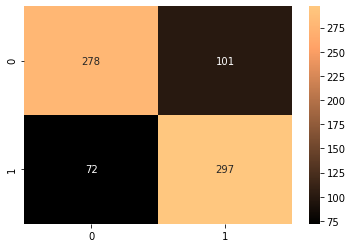

In [1756]:
sb.heatmap(cm, annot = True, cmap = plt.cm.copper, fmt = "g")

from the confusion matrix visualization, The model mistakenly classifier 70 people as  not leaving the business (false positive)<br>
90 customers are mistakenly classfied as leaving when in actual fact they are not leaving (false negative)

In [1757]:
print(classification_report(Y_Test_Under, pred_under))

              precision    recall  f1-score   support

           0       0.79      0.73      0.76       379
           1       0.75      0.80      0.77       369

    accuracy                           0.77       748
   macro avg       0.77      0.77      0.77       748
weighted avg       0.77      0.77      0.77       748



#  Summary on the Undersample data

xgboost performs better on the training set than logististic regression at 85.6% compare to logistic regression at 77.8%.<br>
However, Logistic regression perform better than the xgboost on the test data at 77.8% compare to xgboost at 74.5%. <br>
This shows the xgboost model is overfitting the train set. <br>
from the classification report on logistics regression, 81% recall score on the customer leaving the business compare to 75% of the score staying. <br>
This implies that, The model will detect more customers leaving the business 81% chance.

#  OverSampling The Minority Class

In [1758]:
Over_Sample = RandomOverSampler(sampling_strategy = "minority")
Over_X, Over_Y = Over_Sample.fit_resample(X,Y)

In [1759]:
Over_Y.value_counts()

0    5163
1    5163
Name: Churn, dtype: int64

In [1760]:
X

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,TotChargesPerTenure,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,-1.280248,-1.161694,-0.994194,-1.157889,1,0,0,1,1,...,0,1,0,0,0,1,0,0,1,0
1,0,0.064303,-0.260878,-0.173740,-0.305658,0,1,1,0,1,...,0,0,1,0,1,0,0,0,0,1
2,0,-1.239504,-0.363923,-0.959649,-0.355305,0,1,1,0,1,...,0,1,0,0,0,1,0,0,0,1
3,0,0.512486,-0.747850,-0.195248,-0.791614,0,1,1,0,1,...,0,0,1,0,1,0,1,0,0,0
4,0,-1.239504,0.196178,-0.940457,0.365282,1,0,1,0,1,...,0,1,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,-0.343137,0.664868,-0.129180,0.600922,0,1,0,1,0,...,1,0,1,0,0,1,0,0,0,1
7039,0,1.612573,1.276493,2.241056,1.241167,1,0,0,1,0,...,1,0,1,0,0,1,0,1,0,0
7040,0,-0.872808,-1.170004,-0.854514,-1.103374,1,0,0,1,0,...,0,1,0,0,0,1,0,0,1,0
7041,1,-1.158016,0.319168,-0.872095,0.392615,0,1,0,1,1,...,0,1,0,0,0,1,0,0,0,1


In [1761]:
Over_X

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,TotChargesPerTenure,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,-1.280248,-1.161694,-0.994194,-1.157889,1,0,0,1,1,...,0,1,0,0,0,1,0,0,1,0
1,0,0.064303,-0.260878,-0.173740,-0.305658,0,1,1,0,1,...,0,0,1,0,1,0,0,0,0,1
2,0,-1.239504,-0.363923,-0.959649,-0.355305,0,1,1,0,1,...,0,1,0,0,0,1,0,0,0,1
3,0,0.512486,-0.747850,-0.195248,-0.791614,0,1,1,0,1,...,0,0,1,0,1,0,1,0,0,0
4,0,-1.239504,0.196178,-0.940457,0.365282,1,0,1,0,1,...,0,1,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10321,1,-1.117272,0.831071,-0.785623,1.183438,0,1,1,0,1,...,1,1,0,0,0,1,0,0,1,0
10322,0,0.390254,0.648248,0.575794,0.683768,1,0,0,1,1,...,0,1,0,0,0,1,0,0,1,0
10323,0,-1.280248,-0.154509,-0.980826,-0.154037,1,0,1,0,1,...,1,1,0,0,0,1,0,0,1,0
10324,0,-1.280248,0.658220,-0.970039,0.656001,0,1,1,0,1,...,1,1,0,0,0,1,0,0,0,1


#  Creating Train and test data from sklearn model selection

In [1762]:
X_Train_Over, X_Test_Over, Y_Train_Over, Y_Test_Over = train_test_split(Over_X, Over_Y, random_state = 42, test_size = 0.2, shuffle = True)

In [1763]:
Classifiers = {
    
    "LogisticsRegression": LogisticRegression(n_jobs = -1 ),
    
    "Kneighbours": KNeighborsClassifier(n_neighbors = 2),
    
    "SupportVector": SVC(),
    
    "DecisionTree" : DecisionTreeClassifier(max_depth = 4),
    
    "RandomForest" : RandomForestClassifier(),
    
    "xgb" : XGBClassifier(booster = "gbtree", n_jobs = -1, max_depth = 3, eval_metric = "logloss", eta = 0.3, gamma = 0.1,  use_label_encoder = False, objective = "binary:logistic")
    
    }
score = []
for name,  classifier in Classifiers.items():
    n_folds = KFold(n_splits = 5, shuffle = True, random_state = 42)
    cv_score = cross_val_score(classifier, X_Train_Over, Y_Train_Over, cv = n_folds, scoring = "accuracy")
    score.append(cv_score)
    print(f"{name} accuracy is: {np.mean(score)}")
    print()

LogisticsRegression accuracy is: 0.7708232445520581

Kneighbours accuracy is: 0.7754237288135593

SupportVector accuracy is: 0.7757465698143664

DecisionTree accuracy is: 0.7713377723970944

RandomForest accuracy is: 0.7919612590799032

xgb accuracy is: 0.7935431799838579



In [1764]:
fold = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 42)
accuracy = []
for fold, (train_index, val_index) in enumerate(fold.split(Over_X, Over_Y)):
    Fold_X_Train = Over_X.iloc[train_index]
    Fold_X_Test = Over_X.iloc[val_index]   
    Fold_Y_Train = Over_Y[train_index]    
    Fold_Y_Test = Over_Y[val_index]    
    
    Log = LogisticRegression(n_jobs = -1)
    Log.fit(Fold_X_Train, Fold_Y_Train)
    score = Log.score(Fold_X_Test, Fold_Y_Test)
    print(f" fold {fold + 1} accuracy : {score}")
    print()
    accuracy.append(score)
          
print("Overall accuracy is ", np.mean(accuracy))
    

 fold 1 accuracy : 0.7705711519845111

 fold 2 accuracy : 0.7757869249394673

 fold 3 accuracy : 0.763680387409201

 fold 4 accuracy : 0.7815980629539951

 fold 5 accuracy : 0.7631961259079904

Overall accuracy is  0.770966530639033


In [1765]:
fold = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 42)
accuracy = []
for fold, (train_index, val_index) in enumerate(fold.split(Over_X, Over_Y)):
    Fold_X_Train = Over_X.iloc[train_index]
    Fold_X_Test = Over_X.iloc[val_index]   
    Fold_Y_Train = Over_Y[train_index]    
    Fold_Y_Test = Over_Y[val_index]    
    
    Forest = RandomForestClassifier(n_jobs = -1)
    Forest.fit(Fold_X_Train, Fold_Y_Train)
    score = Forest.score(Fold_X_Test, Fold_Y_Test)
    print(f" fold {fold + 1} accuracy : {score}")
    print()
    accuracy.append(score)
          
print("Overall accuracy is ", np.mean(accuracy))

 fold 1 accuracy : 0.9036786060019361

 fold 2 accuracy : 0.9046004842615012

 fold 3 accuracy : 0.8813559322033898

 fold 4 accuracy : 0.8929782082324456

 fold 5 accuracy : 0.8900726392251816

Overall accuracy is  0.8945371739848909


In [1766]:
fold = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 42)
accuracy = []
for fold, (train_index, val_index) in enumerate(fold.split(Over_X, Over_Y)):
    Fold_X_Train = Over_X.iloc[train_index]
    Fold_X_Test = Over_X.iloc[val_index]   
    Fold_Y_Train = Over_Y[train_index]    
    Fold_Y_Test = Over_Y[val_index]    
    
    boost = XGBClassifier(booster = "gbtree", n_jobs = -1, max_depth = 3, eval_metric = "logloss", eta = 0.3, gamma = 0.1,  use_label_encoder = False, objective = "binary:logistic")
    
    boost.fit(Fold_X_Train, Fold_Y_Train)
    score = boost.score(Fold_X_Test, Fold_Y_Test)
    print(f" fold {fold + 1} accuracy : {score}")
    print()
    accuracy.append(score)
          
print("Overall accuracy is ", np.mean(accuracy))
    

 fold 1 accuracy : 0.8092933204259438

 fold 2 accuracy : 0.7985472154963681

 fold 3 accuracy : 0.801452784503632

 fold 4 accuracy : 0.8053268765133171

 fold 5 accuracy : 0.8009685230024213

Overall accuracy is  0.8031177439883365


In [1767]:
Forest = RandomForestClassifier(n_jobs = -1)
Forest.fit(X_Train_Over, Y_Train_Over)


RandomForestClassifier(n_jobs=-1)

# Performace on training set from Random Forest

In [1768]:
Forest.score(X_Train_Over, Y_Train_Over)

0.998547215496368

In [1769]:
Forest_pred = Forest.predict(X_Test_Over)

# Performance on test set from Random Forest

In [1770]:
accuracy = accuracy_score(Y_Test_Over, Forest_pred)
accuracy

0.8954501452081317

# 89.5% accuracy on test set

In [1771]:
cm = confusion_matrix(Y_Test_Over, Forest_pred)

In [1772]:
boost = XGBClassifier(booster = "gbtree", n_jobs = -1, max_depth = 3, eval_metric = "logloss", eta = 0.3, gamma = 0.1,  use_label_encoder = False, objective = "binary:logistic")
boost.fit(X_Train_Over, Y_Train_Over)



XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, eta=0.3,
              eval_metric='logloss', gamma=0.1, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=-1, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', use_label_encoder=False,
              validate_parameters=1, verbosity=None)

# Performance on Training set from xgboost

In [1773]:
boost.score(X_Train_Over, Y_Train_Over)

0.8437046004842615

# 83% accuracy on training set from xgboost

In [1774]:
boost_pred = boost.predict(X_Test_Under)

In [1775]:
accuracy_score(Y_Test_Under, boost_pred)

0.8181818181818182

# 82% accuracy on test set from xgboost

# The Random Forest performs better as demonstrated above on the test set

In [1776]:
cm = confusion_matrix(Y_Test_Over, Forest_pred)

<AxesSubplot:>

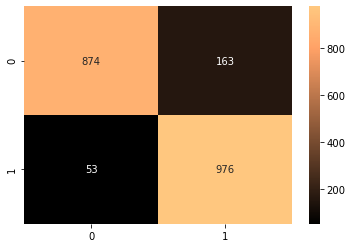

In [1777]:
sb.heatmap(cm, annot = True, cmap = plt.cm.copper, fmt = "g")

In [1778]:
print(classification_report(Y_Test_Over, Forest_pred))

              precision    recall  f1-score   support

           0       0.94      0.84      0.89      1037
           1       0.86      0.95      0.90      1029

    accuracy                           0.90      2066
   macro avg       0.90      0.90      0.90      2066
weighted avg       0.90      0.90      0.90      2066



# in summary, The Random Forest classifier performs better on the test set than xgboost at 89.5%

The random forest overfit the training set at 99.9% but perform farely well on the test set<br>
with a recall of 95% for the positive Churn (customer leaving the company and over all f1 score of 90%, The Oversample RandomForest model<br>
performs best and the model will be able to significantly predict customer leaving the company

# Hyper Parameter Tuning of the Model


In [1779]:
from sklearn.model_selection import GridSearchCV

In [1780]:
parameters_grid = [ {"n_estimators" : [3,10, 20], "max_features": [2,4,6,8], "max_depth": [1,2,3,4] } ,
                   {"bootstrap": [False, True], "n_estimators": [20, 50,100], "max_features": [2,3,4]}]

In [1781]:
Forest = RandomForestClassifier(n_jobs = -1)
Forest.fit(X_Train_Over, Y_Train_Over)

RandomForestClassifier(n_jobs=-1)

In [1782]:
Model_Grid = GridSearchCV(Forest, parameters_grid, cv = 5, scoring = "accuracy", return_train_score = True)

In [1783]:
Model_Grid.fit(X_Train_Over, Y_Train_Over)

GridSearchCV(cv=5, estimator=RandomForestClassifier(n_jobs=-1),
             param_grid=[{'max_depth': [1, 2, 3, 4],
                          'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 20]},
                         {'bootstrap': [False, True], 'max_features': [2, 3, 4],
                          'n_estimators': [20, 50, 100]}],
             return_train_score=True, scoring='accuracy')

In [1784]:
Model_Grid.best_params_

{'bootstrap': False, 'max_features': 4, 'n_estimators': 50}

In [1785]:
model = Model_Grid.best_estimator_
model

RandomForestClassifier(bootstrap=False, max_features=4, n_estimators=50,
                       n_jobs=-1)

In [1786]:
model.fit(X_Train_Over, Y_Train_Over)

RandomForestClassifier(bootstrap=False, max_features=4, n_estimators=50,
                       n_jobs=-1)

In [1787]:
pred = model.predict(X_Test_Over)

# Performance on training set

In [1788]:
accuracy_score(Y_Test_Over, pred)


0.9075508228460794

In [1789]:
cm = confusion_matrix(Y_Test_Over, pred)

<AxesSubplot:>

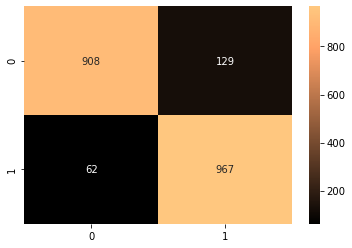

In [1790]:
sb.heatmap(cm, annot = True, cmap = plt.cm.copper, fmt = "g")


In [1791]:
print(classification_report(Y_Test_Over, pred))

              precision    recall  f1-score   support

           0       0.94      0.88      0.90      1037
           1       0.88      0.94      0.91      1029

    accuracy                           0.91      2066
   macro avg       0.91      0.91      0.91      2066
weighted avg       0.91      0.91      0.91      2066



#  f1 score of 90% on both Class with overall 90% f1 score for the Hyper Tuned Model.
# Recall for Customers leaving the company also increase to 93% giving better chance of detecting customers leaving the firm

# Visualizing the ROC and Precision recall curve

In [1792]:
Score = cross_val_predict(model, X_Train_Over, Y_Train_Over, cv = 10, method = "predict_proba")

In [1793]:
Score = np.argmax(Score, axis = 1)

In [1794]:
precision, recall, Threshold = precision_recall_curve(Y_Train_Over, Score)

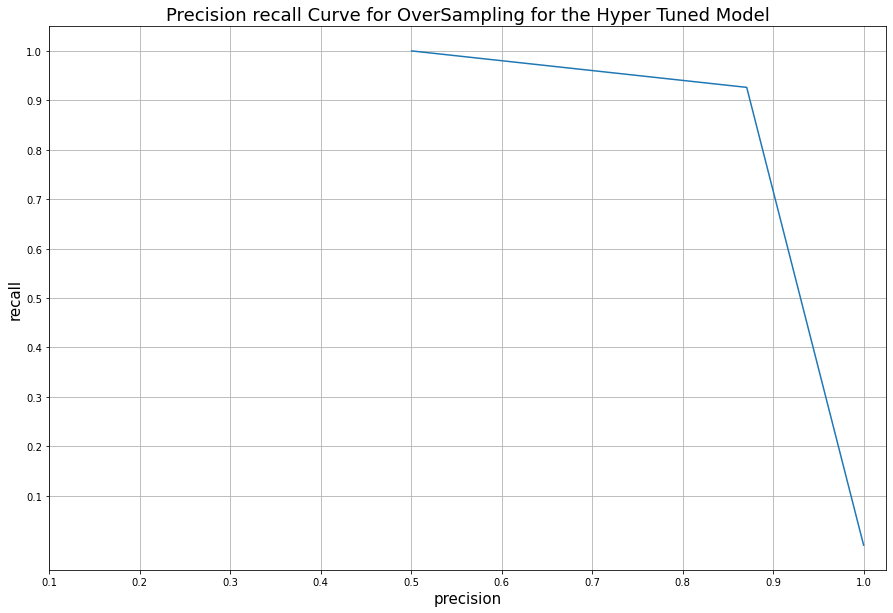

In [1795]:
plt.figure(figsize = (15,10))
plt.plot(precision, recall)
plt.xlabel("precision", size = 15)
plt.ylabel("recall", size = 15)
plt.title("Precision recall Curve for OverSampling for the Hyper Tuned Model", size = 18)
plt.xticks(np.linspace(0.1,1.0,10))
plt.yticks(np.linspace(0.1,1.0,10))
plt.grid()

The precison start falling sharply a liitle above 90% recall

In [1796]:
fpr_Over, tpr_Over, threshholds_Over = roc_curve(Y_Train_Over, Score)

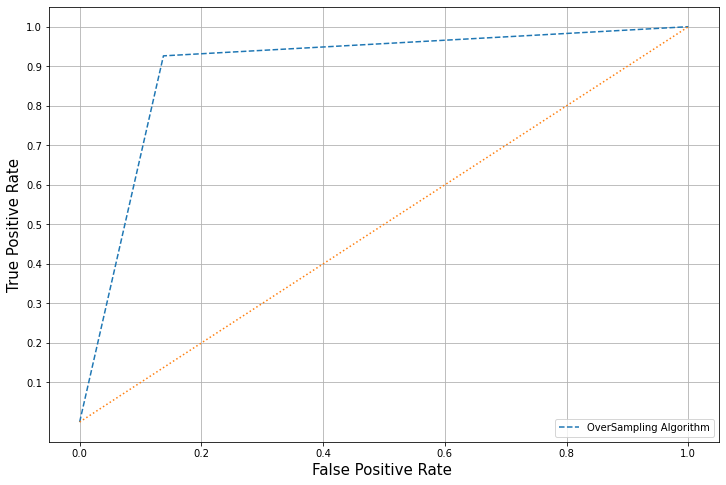

In [1797]:
plt.figure(figsize = (12,8))
plt.xlabel("False Positive Rate ", size = 15)
plt.ylabel("True Positive Rate", size = 15)
#plt.plot(fpr, tpr, label = "Undersampling Algorithm", linestyle = "solid")
plt.plot(fpr_Over, tpr_Over, label = "OverSampling Algorithm", linestyle = "dashed")
plt.plot([0,1],[0,1], linestyle = "dotted")
plt.yticks(np.linspace(0.1,1.0,10))
plt.legend(loc = 4)
plt.grid()

 The True Positive rate (recall strat declining a little after the 90% accuracy)

In [1798]:
score = cross_val_predict(Log_Under, X_Train_Under, Y_Train_Under, cv = 5, method = "decision_function")

In [1799]:
score

array([-1.09747633,  0.91539993,  1.94330156, ..., -2.56444539,
        1.22948593,  0.93753919])

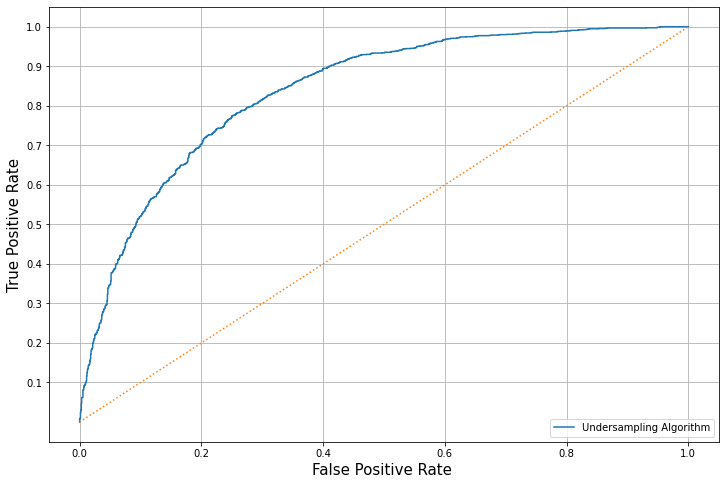

In [1800]:
fpr_Under, tpr_Under, threshholds_Under = roc_curve(Y_Train_Under, score)
plt.figure(figsize = (12,8))
plt.xlabel("False Positive Rate ", size = 15)
plt.ylabel("True Positive Rate", size = 15)
plt.plot(fpr_Under, tpr_Under, label = "Undersampling Algorithm", linestyle = "solid")
#plt.plot(fpr_Over, tpr_Over, label = "OverSampling Algorithm", linestyle = "dashed")
plt.plot([0,1],[0,1], linestyle = "dotted")
plt.yticks(np.linspace(0.1,1.0,10))
plt.legend(loc = 4)
plt.grid()

The True Positive rate (recall strat declining a little after the 70% accuracy)

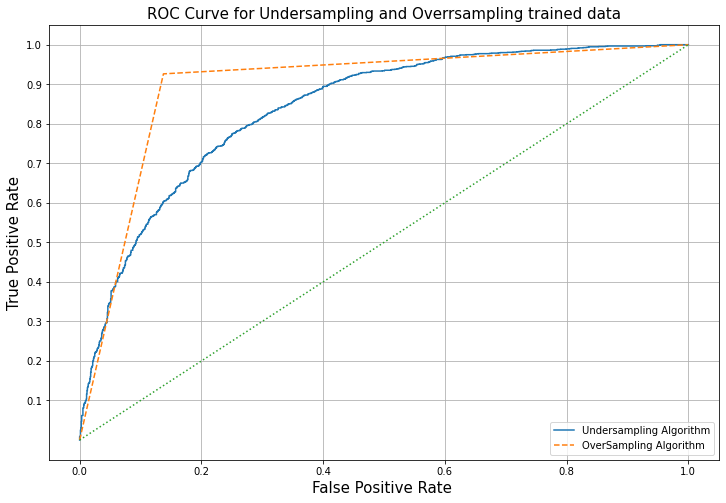

In [1801]:
fpr_Under, tpr_Under, threshholds_Under = roc_curve(Y_Train_Under, score)
plt.figure(figsize = (12,8))
plt.xlabel("False Positive Rate ", size = 15)
plt.ylabel("True Positive Rate", size = 15)
plt.plot(fpr_Under, tpr_Under, label = "Undersampling Algorithm", linestyle = "solid")
plt.plot(fpr_Over, tpr_Over, label = "OverSampling Algorithm", linestyle = "dashed")
plt.plot([0,1],[0,1], linestyle = "dotted")
plt.yticks(np.linspace(0.1,1.0,10))
plt.title("ROC Curve for Undersampling and Overrsampling trained data", size = 15)
plt.legend(loc = 4)
plt.grid()

# In summary

The Oversampled Random Forest algorithm gives the higest score (90.2%) on the test set <br>and recall  of 93% for the Positive class (detection of Customers leaving the company)<br>

Also, overall f1 score 90% shows the improved performance of the model on the test set<br>

The Model performed better on the Oversample data than the undersample data with Random Forest classifier accuracy<br> 
going as high as 99.9 on training set and 90.2% on the test set

With a recall of 90% for class 1 (customer leaving the company), The model have a very good chance of predicting customers leaving the company.
